## Task 1 - Data collection 



### Importing our libraries

In [1]:
import io
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import matplotlib.dates as mdates

### NCDC Website scrape

In [2]:
# Usisng pd.read html
df = pd.read_html('https://covid19.ncdc.gov.ng/', header=0)
df = df[0]

### John Hopkins Data Repository from GitHub

In [3]:
#Confirmed cases

url1 = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
download = requests.get(url1).content
df1 = pd.read_csv(io.StringIO(download.decode('utf-8')))
confirmed_cases = df1.loc[df1['Country/Region'] == 'Nigeria']

#Recovered cases

url2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
download2 = requests.get(url2).content
df2 = pd.read_csv(io.StringIO(download2.decode('utf-8')))
recovered_cases = df2.loc[df2['Country/Region'] == 'Nigeria']


#Death cases

url3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
download3 = requests.get(url3).content
df3 = pd.read_csv(io.StringIO(download3.decode('utf-8')))
death_cases = df3.loc[df3['Country/Region'] == 'Nigeria']


### External Data

In [4]:
covid_external = pd.read_csv('covid_external.csv')
budget = pd.read_csv('Budget data.csv')
gdp = pd.read_csv('RealGDP.csv')

## Task 2 - Viewing the  Data

In [5]:
df.head()

,States Affected,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths
0,Lagos,77934,262,76919,753
1,FCT,23412,1109,22080,223
2,Rivers,12785,45,12586,154
3,Kaduna,10130,60,9990,80
4,Plateau,9881,6,9804,71


In [6]:
death_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21
202,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,2900,2902,2902,2905,2906,2906,2914,2922,2933,2949


In [7]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21
202,NaN,Nigeria,9.082,8.6753,0,0,0,0,0,0,...,212359,212446,212511,212627,212713,212765,212829,212894,212947,213076


We need to clean the data from john john hopkins repo to make it more explanatory 

In [8]:
covid_external.head()

,states,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,FCT,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
1,Plateau,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
2,Kwara,North Central,3524000,0.3,0.4,0.3,0.2,0.4,0.2,0.6,0.7,0.93
3,Nassarawa,North Central,2783000,0.1,0.3,0.5,0.9,0.0,0.1,0.6,0.5,0.85
4,Niger,North Central,6260000,0.6,0.0,0.6,0.3,0.7,0.1,0.8,0.8,0.84


In [9]:
budget.head()

,states,Initial_budget (Bn),Revised_budget (Bn)
0,Abia,136.60,102.70
1,Adamawa,183.30,139.31
2,Akwa-Ibom,597.73,366.00
3,Anambra,137.10,112.80
4,Bauchi,167.20,128.00


In [10]:
gdp.head()

,Year,Q1,Q2,Q3,Q4
0,2014,15438679.50,16084622.31,17479127.58,18150356.45
1,2015,16050601.38,16463341.91,17976234.59,18533752.07
2,2016,15943714.54,16218542.41,17555441.69,18213537.29
3,2017,15797965.83,16334719.27,17760228.17,18598067.07
4,2018,16096654.19,16580508.07,18081342.10,19041437.59


## Task 3 - Cleaning the Data

Cleaning the data from john hopkins repo

In [11]:
data = pd.concat([confirmed_cases, recovered_cases, death_cases], ignore_index=True)
data = data.T
data = data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'])
data.reset_index(level=0, inplace= True)
data.rename(columns={'index': "Date", 0: 'confirmed cases', 1: 'recovered cases', 2: 'death cases'}, inplace=True)
data.tail()

,Date,confirmed cases,recovered cases,death cases
656,11/8/21,212765,0,2906
657,11/9/21,212829,0,2914
658,11/10/21,212894,0,2922
659,11/11/21,212947,0,2933
660,11/12/21,213076,0,2949


Here we look through all data types and convert to appropiate data types. 
Modify of dataset so that we can get more insight from them 

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   States Affected               37 non-null     object
 1   No. of Cases (Lab Confirmed)  37 non-null     int64 
 2   No. of Cases (on admission)   37 non-null     int64 
 3   No. Discharged                37 non-null     int64 
 4   No. of Deaths                 37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             661 non-null    object
 1   confirmed cases  661 non-null    object
 2   recovered cases  661 non-null    object
 3   death cases      661 non-null    object
dtypes: object(4)
memory usage: 20.8+ KB


All columns above are objects, and needs to be converted to appropriate data type.

In [14]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [15]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   states               37 non-null     object 
 1   Initial_budget (Bn)  37 non-null     float64
 2   Revised_budget (Bn)  37 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1016.0+ bytes


In [16]:
gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    7 non-null      int64  
 1   Q1      7 non-null      float64
 2   Q2      7 non-null      float64
 3   Q3      7 non-null      float64
 4   Q4      7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


Year Column in gdp needs to be converted to datetime

In [17]:
#Converting to appropiate data type from data annd gdp table

data['Date'] = pd.to_datetime(data['Date'])
data['confirmed cases'] = data['confirmed cases'].astype(str).astype(int)
data['recovered cases'] = data['recovered cases'].astype(int)
data['death cases'] = data['death cases'].astype(int)
gdp['Year'] = pd.to_datetime(gdp['Year'], format='%Y')
gdp['Year'] = gdp['Year'].dt.year

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             661 non-null    datetime64[ns]
 1   confirmed cases  661 non-null    int32         
 2   recovered cases  661 non-null    int32         
 3   death cases      661 non-null    int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 13.0 KB


TODO 1 - Dataframe for daily confirmed cases in Nigeria

In [18]:
daily_confirmed_cases = data[["Date", 'confirmed cases']]
daily_confirmed_cases.set_index("Date", inplace=True)

TODO 2 - Dataframe for daily recovered cases in Nigeria

In [19]:
daily_recovered_cases = data[["Date", 'recovered cases']]
daily_recovered_cases.set_index("Date", inplace=True)

TODO 3 - Dataframe for daily death cases in Nigeria

In [20]:
daily_death_cases = data[["Date", 'death cases']]
daily_death_cases.set_index("Date", inplace=True)

## Task 4 - Analysis and Visualization

TODO 1 - TOP 10 CONFIRMED CASES BY LAB TEST

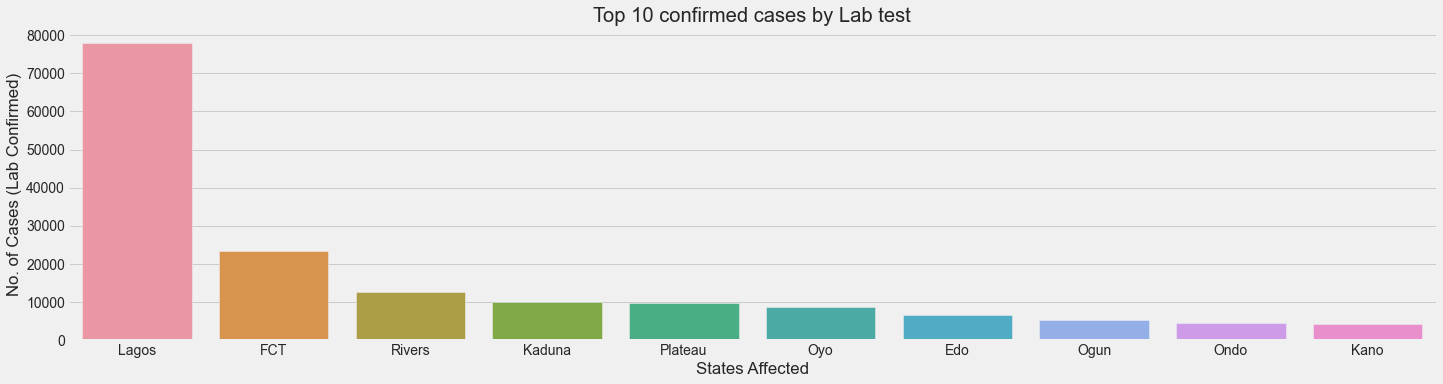

In [21]:
df1 = df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)
df1 = df1.head(10)


p = sns.catplot(x='States Affected', y='No. of Cases (Lab Confirmed)', data = df1, kind= 'bar', aspect=4)
p.set(title='Top 10 confirmed cases by Lab test')

Lagos state has the highest number of confirmed cases, more than x2 of the following state, Abuja.
4 of the six southwestern state are in the top 10 confirmed cases.

TODO 2 - TOP 10 DISCHARGED CASES

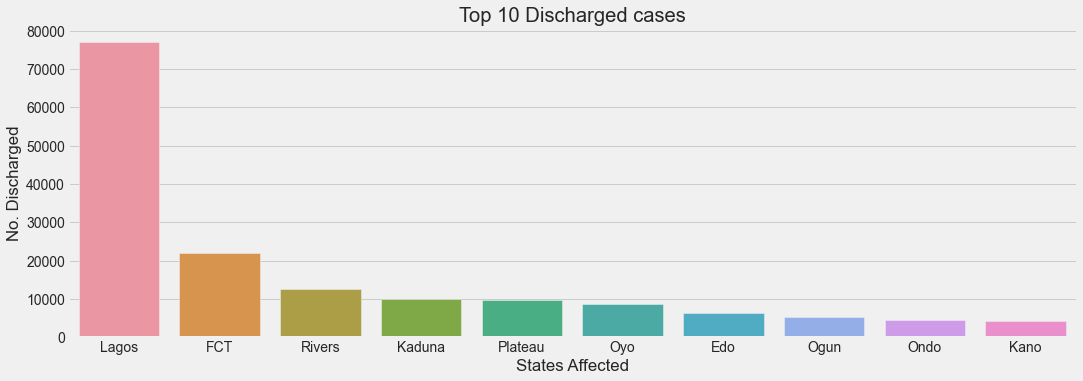

In [22]:
df2 = df.sort_values(by='No. Discharged', ascending= False)
df2 = df2.head(10)

p = sns.catplot(x='States Affected', y='No. Discharged', data = df2, kind= 'bar', aspect=3)
p.set(title='Top 10 Discharged cases')

The order here follows that of confirmed cases, i.e the higher the cases confirmed, the higher the numbers discharged

TODO 3 - TOP 10 DEATH CASES

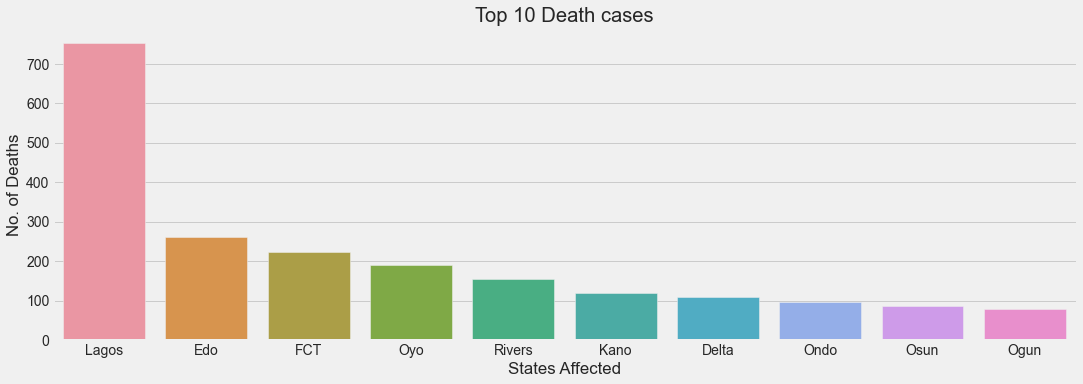

In [23]:
df3 = df.sort_values(by='No. of Deaths', ascending= False)
df3 = df3.head(10)

p = sns.catplot(x='States Affected', y='No. of Deaths', data = df3, kind= 'bar', aspect=3)
p.set(title='Top 10 Death cases')

Close to the order of confirmed cases, but slightly different.
Here Lagos remains highest,but followed by Edo as opposed to FCT in previous data.
All states here appaered in the highest number of confirmed cases, except DELTA.

TODO 4- GENERATING PLOT FOR TOTAL DAILY CONFIRMED CASES, RECOVERED AND DEATH CASES

In [24]:
years = mdates.YearLocator() #every year
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y-%m")

In [25]:
def plotgraph(table_name, col):
    fig, axes = plt.subplots(figsize=(20, 7))

    sns.lineplot(data=table_name[col], label=col)

    axes.xaxis.set_major_locator(months)
    axes.xaxis.set_major_formatter(years_fmt)
    axes.xaxis.set_minor_locator(months)

    plt.xticks(rotation = 'vertical')
    plt.show()

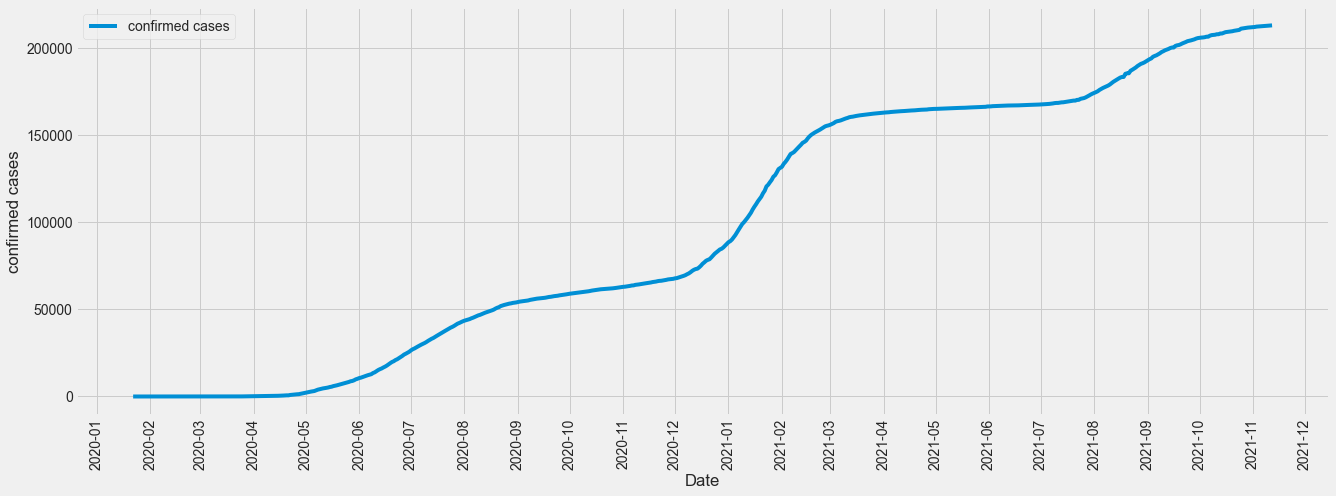

In [26]:
plotgraph(daily_confirmed_cases, 'confirmed cases')

Here, cases kept on increasing till current date. First case was confirmed in the late 2019.

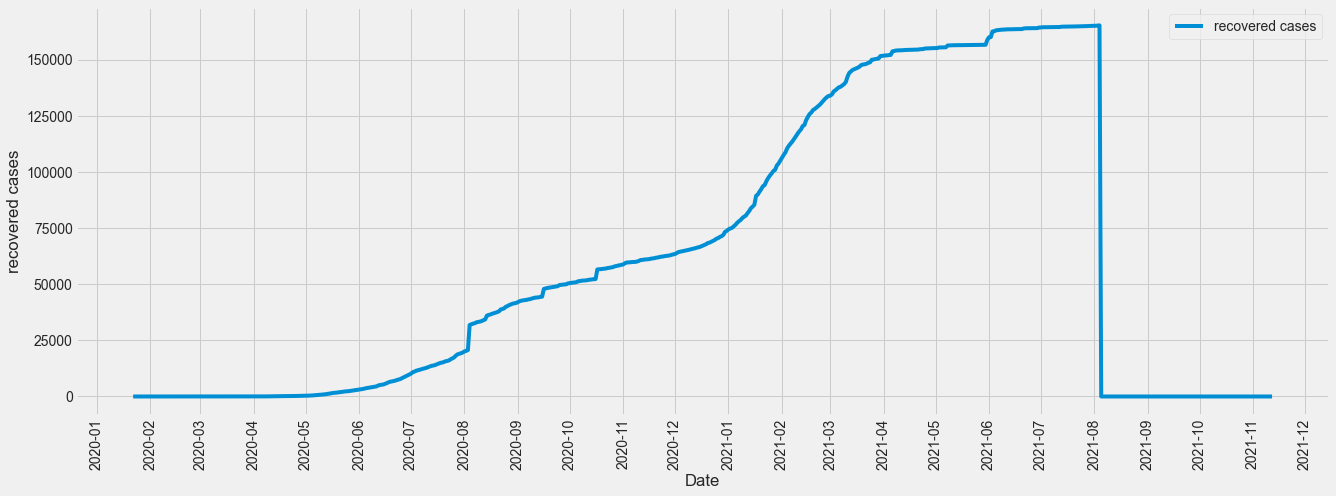

In [27]:
plotgraph(daily_recovered_cases, 'recovered cases')

It looks like we have our first discharged cases almost close to when first case was confirmed. Here cases kept on increasing till August, 2021, there was a drop in the cases dischrged.
Looks like it became more overwhelming and intense due to the large cases confirmed in total.

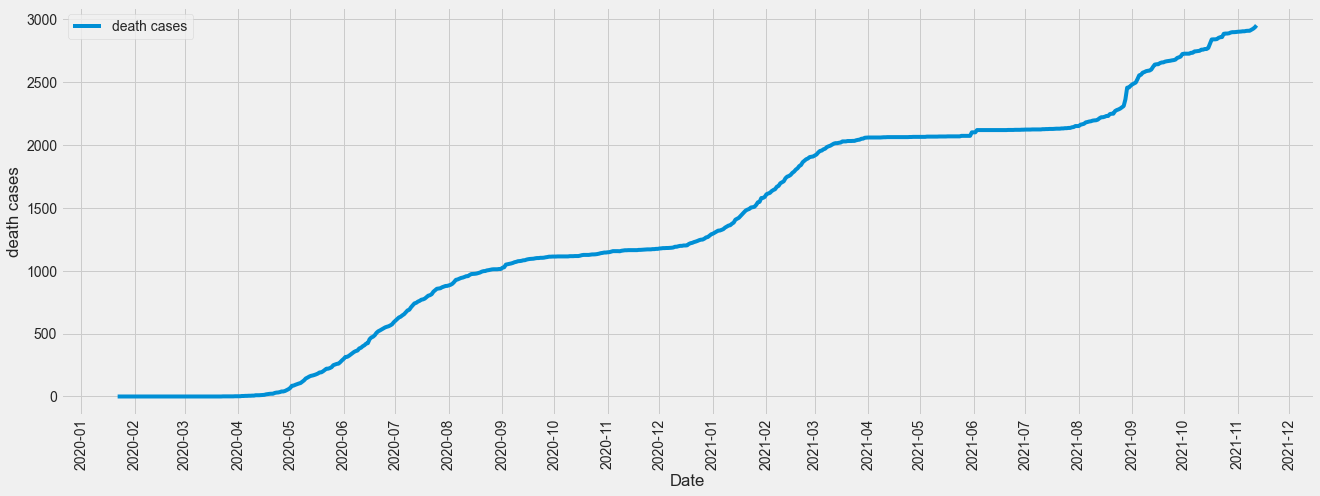

In [28]:
plotgraph(daily_death_cases, 'death cases')

First death was also recorded later in 2019, death cases kept on increasing since then.

TODO 5 - CHECKING FOR THE DAY WITH HIGHEST INFECTION RATE

In [29]:
daily_confirmed_cases['infection rate'] = daily_confirmed_cases['confirmed cases'].diff()
daily_confirmed_cases

,confirmed cases,infection rate
Date,,
2020-01-22,0,NaN
2020-01-23,0,0.0
2020-01-24,0,0.0
2020-01-25,0,0.0
2020-01-26,0,0.0
...,...,...
2021-11-08,212765,52.0
2021-11-09,212829,64.0
2021-11-10,212894,65.0


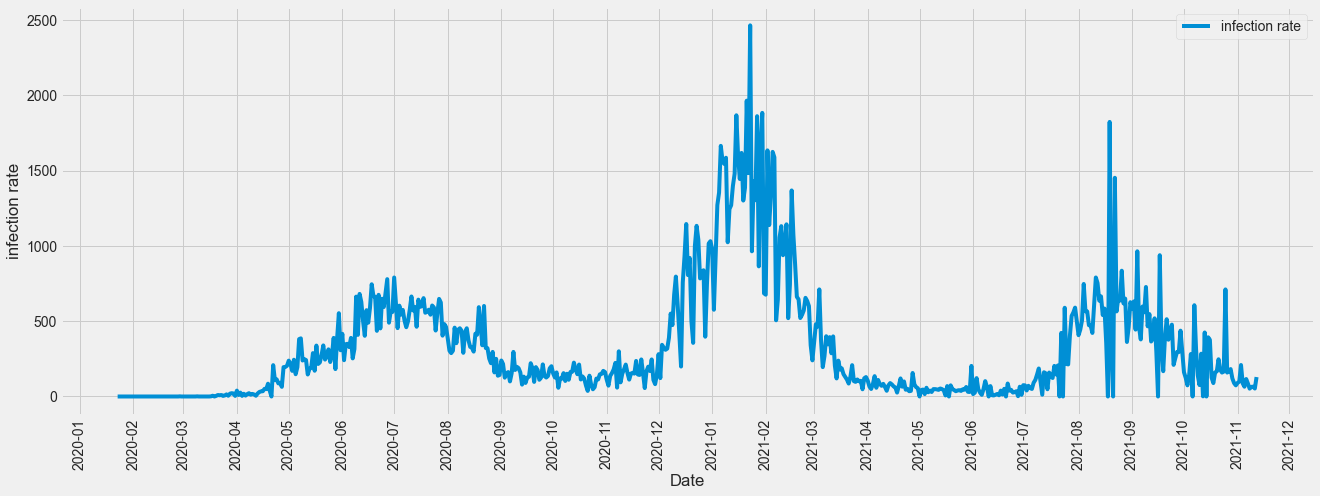

In [30]:
plotgraph(daily_confirmed_cases, 'infection rate')
#sns.lineplot(x='Date', y='infection rate', data=daily_confirmed_cases)

In [31]:
daily_confirmed_cases.loc[daily_confirmed_cases['infection rate'] == daily_confirmed_cases['infection rate'].max()]

,confirmed cases,infection rate
Date,,
2021-01-23,120602,2464.0


Max infection rate in a day in is 23rd of Jan 2021

TODO 6 - CHECKING FOR RELATIONSHIP BETWEEN EXTERNAL DATASET AND NCDC DATASET AFTER MERGING TWO DATAFRAMES

In [32]:
#Merge using pd.merge
df.rename(columns={'States Affected': 'states'}, inplace=True)   # rename df state column and merge on states.
new_df = pd.merge(df, covid_external, on='states')

In [33]:
new_df = new_df.sort_values(by='No. of Cases (Lab Confirmed)', ascending=False)
new_df1 = new_df.head(10)
new_df1

,states,No. of Cases (Lab Confirmed),No. of Cases (on admission),No. Discharged,No. of Deaths,region,Population,Overall CCVI Index,Age,Epidemiological,Fragility,Health System,Population Density,Socio-Economic,Transport Availability,Acute IHR
0,Lagos,77934,262,76919,753,South West,13992000,0.0,0.1,1.0,0.3,0.1,1.0,0.1,0.4,0.93
1,FCT,23412,1109,22080,223,North Central,4865000,0.3,0.0,0.9,0.4,0.6,0.9,0.6,0.2,0.79
2,Rivers,12785,45,12586,154,South South,7763000,0.4,0.5,0.9,0.6,0.6,0.9,0.1,0.1,1.00
3,Kaduna,10130,60,9990,80,North West,9227000,0.7,0.1,0.9,0.8,0.9,0.4,0.6,0.4,0.86
4,Plateau,9881,6,9804,71,North Central,4766000,0.4,0.5,0.4,0.8,0.3,0.3,0.5,0.3,0.93
5,Oyo,8764,13,8560,191,South West,8737000,0.2,0.7,0.8,0.2,0.8,0.6,0.2,0.3,1.06
6,Edo,6598,-25,6362,261,South South,4705000,0.1,0.9,0.8,0.1,0.1,0.5,0.4,0.3,1.09
7,Ogun,5374,1,5293,80,South West,5878000,0.3,0.6,0.7,0.5,0.6,0.6,0.0,0.2,1.07
8,Ondo,4573,42,4433,98,South West,5185000,0.1,0.8,0.5,0.1,0.3,0.6,0.3,0.3,1.04
9,Kano,4391,56,4215,120,North West,14726000,0.6,0.2,0.1,0.3,0.4,0.8,0.8,0.5,0.87


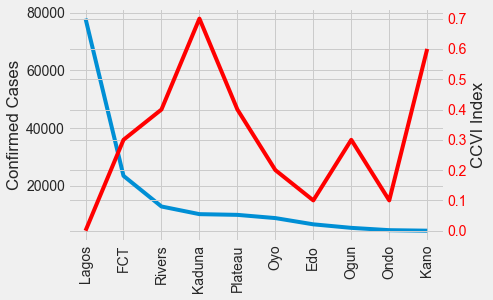

In [34]:
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.plot(new_df1['states'], new_df1['No. of Cases (Lab Confirmed)'])
plt.xticks(rotation=90)
ax1.set_ylabel('Confirmed Cases')


ax2 = ax1.twinx()
ax2.plot(new_df1['states'], new_df1['Overall CCVI Index'], 'r')
ax2.set_ylabel('CCVI Index')
for l in ax2.get_yticklabels():
    l.set_color('r')



From the gragh, it could be said that the overall CCVI Index wasn't a major determinant.

Here's why. 
1. Lagos has least ccvi index,despite ,they have highest number of confirmed cases.(8000, 0)
2. FCT has ccvi of 0.3 and almost 3000 cases.(3000, 0.3)
3. Rivers ccvi of 0.4 , 1000 cases.(1000, 0.4)
4. Kaduna, ccvi of 0.7 and hardly 1000 cases.(1000, 0.7)
5. Pleatue, ccvi of 0.4, hardly 1000 cases.(1000, 0.4)
6. Oyo, ccvi of 0.2, less than 1000 cases.(<1000, 0.2)
7. Edo, ccvi of 0.1, less than 500 cases.(<500, 0.1)
8. Ogun, ccvi of 0.3, lesser cases
9. Ondo, ccvi of 0.1, lesser cases
10. Kano, ccvi of 0.6 with the least confirmed cases.

We can see that there's hardly a direct relationship. But for majority, it has an indirect relationship

TODO 7 - RELATIONSHIP BETWEEN CONFIRMED CASES AND POPULATION DENSITY

<AxesSubplot:xlabel='Population Density', ylabel='No. of Cases (Lab Confirmed)'>

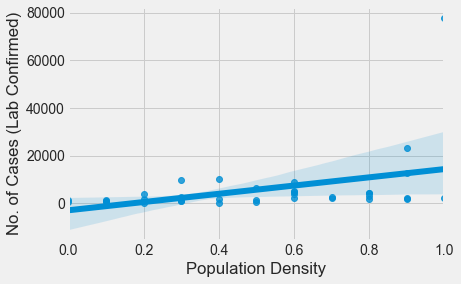

In [35]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Population Density', data=new_df)

There's a positive correlation between confirmed cases and Poupulation density, i.e the higher the population density , the higher the confirmed cases.
    Lagos has a higher population density, and therefore the highest cases confirmed

TODO 8 - RELATIONSHIP BETWEEN CONFIRMED CASES AND AGE

<AxesSubplot:xlabel='Age', ylabel='No. of Cases (Lab Confirmed)'>

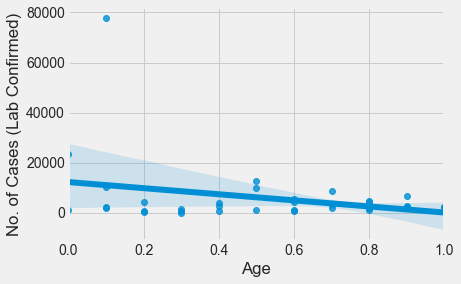

In [36]:
#ind = ['Age', 'Fragility', 'Health system', 'Socio-Economic', 'Acute IHR']

sns.regplot(y='No. of Cases (Lab Confirmed)', x='Age', data=new_df)

There's a negative correlation between confirmed cases and Age.

<AxesSubplot:xlabel='Age', ylabel='No. of Deaths'>

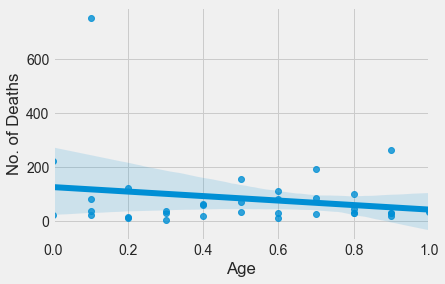

In [37]:
sns.regplot(y='No. of Deaths', x='Age', data=new_df)

TODO 9 - RELATIONSHIP BETWEEN CONFIRMED CASES AND FRAGILITY

<AxesSubplot:xlabel='Fragility', ylabel='No. of Cases (Lab Confirmed)'>

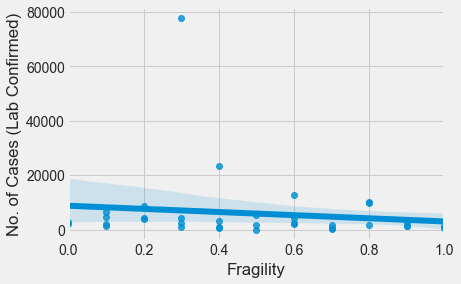

In [38]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Fragility', data=new_df)

There's a negative correlation between confirmed cases and fragility

TODO 10 - RELATIONSHIP BETWEEN CONFIRMED CASES AND HEALTH SYSTEM

<AxesSubplot:xlabel='Health System', ylabel='No. of Cases (Lab Confirmed)'>

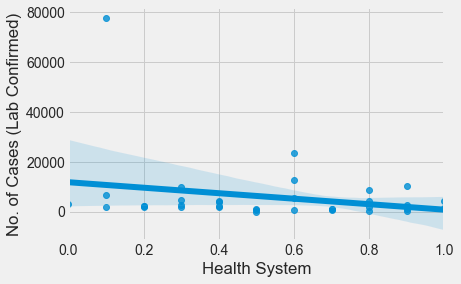

In [39]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Health System', data=new_df)

There's a negative correlation between confirmed cases and Health system, the better the heailth system, the lesser the cases

In [ ]:
sns.regplot(y=')', x='Health System', data=new_df)

TODO 11 - RELATIONSHIP BETWEEN CONFIRMED CASES AND SOCIO-ECONOMIC

<AxesSubplot:xlabel='Socio-Economic', ylabel='No. of Cases (Lab Confirmed)'>

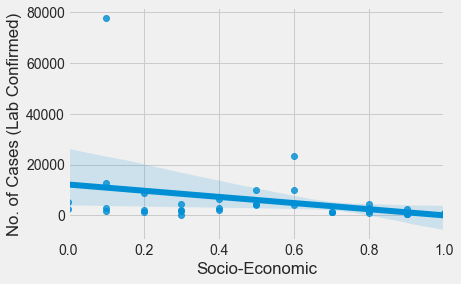

In [40]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Socio-Economic', data=new_df)

There's a negative correlation between confirmed cases and Socio-Economic

TODO 11 - RELATIONSHIP BETWEEN CONFIRMED CASES AND ACUTE IHR

<AxesSubplot:xlabel='Acute IHR', ylabel='No. of Cases (Lab Confirmed)'>

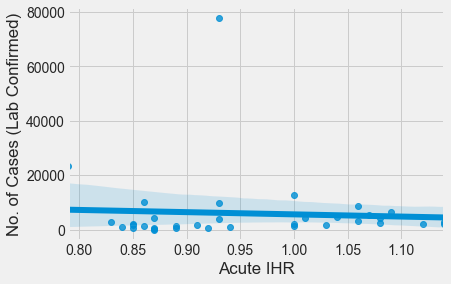

In [41]:
sns.regplot(y='No. of Cases (Lab Confirmed)', x='Acute IHR', data=new_df)

There's a negative or no correlation between confirmed cases and Acute IHR.

TODO 12-DETRMINING THE EFFECT OF PANDEMIC ON THE ECONOMY

In [42]:
gdp_new = pd.melt(gdp, id_vars=['Year'], var_name='Quarters', value_name='Real GDP')

In [43]:
gdp_new

,Year,Quarters,Real GDP
0,2014,Q1,15438679.50
1,2015,Q1,16050601.38
2,2016,Q1,15943714.54
3,2017,Q1,15797965.83
4,2018,Q1,16096654.19
5,2019,Q1,16434552.65
6,2020,Q1,16740000.00
7,2014,Q2,16084622.31
8,2015,Q2,16463341.91
9,2016,Q2,16218542.41


In [44]:
gdp_new.groupby('Year')['Real GDP'].min()

Year
2014    15438679.50
2015    16050601.38
2016    15943714.54
2017    15797965.83
2018    16096654.19
2019    16434552.65
2020           0.00
Name: Real GDP, dtype: float64

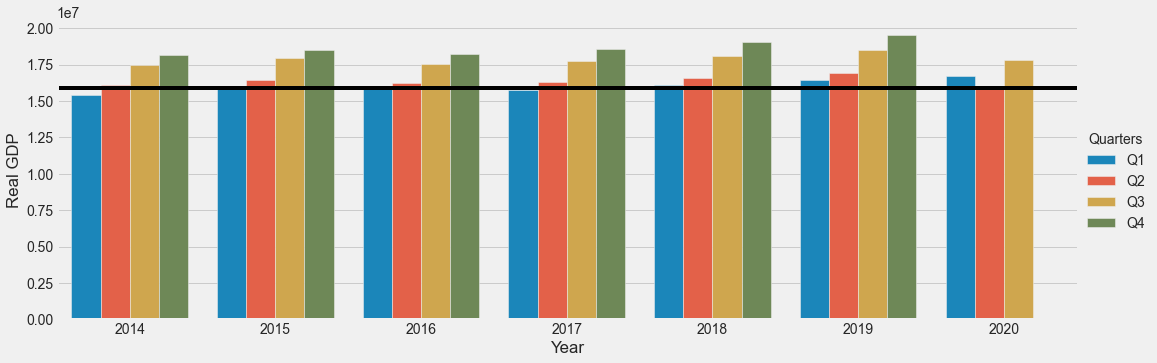

In [45]:
sns.catplot(x='Year', y='Real GDP', data=gdp_new, hue='Quarters', aspect=3, kind='bar')
plt.axhline(y=15890000.00, color="black")
# plt.legend(loc="upper left")

Quarter 2 gdp dropped back to the lowest it has ever been since 2014, due to the restriction enforced by the government.

In [46]:
budget_new = pd.melt(budget, id_vars=['states'], var_name='Budget', value_name='budget_value')
budget_new

,states,Budget,budget_value
0,Abia,Initial_budget (Bn),136.60
1,Adamawa,Initial_budget (Bn),183.30
2,Akwa-Ibom,Initial_budget (Bn),597.73
3,Anambra,Initial_budget (Bn),137.10
4,Bauchi,Initial_budget (Bn),167.20
...,...,...,...
69,Sokoto,Revised_budget (Bn),153.00
70,Taraba,Revised_budget (Bn),150.50
71,Yobe,Revised_budget (Bn),86.00
72,Zamfara,Revised_budget (Bn),127.30


<AxesSubplot:xlabel='states', ylabel='budget_value'>

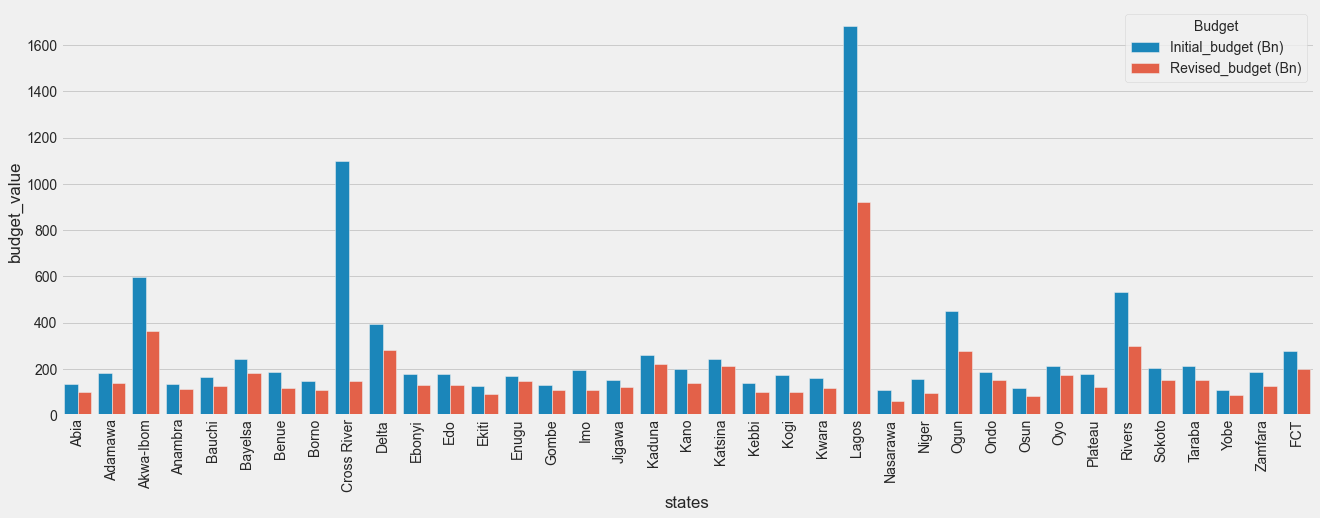

In [47]:
plt.subplots(figsize=(20, 7))
plt.xticks(rotation = 'vertical')
sns.barplot(x='states', y='budget_value', data=budget_new, hue='Budget')
# plt.legend(loc="lower left")

Budget were revisited and reduced by every state due to the corona virus.
